In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

import csv

import scipy
from scipy import stats


In [2]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

np.random.seed(4)
vectorDim = 100

numNode = 500



Using Numpy backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PeterDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [4]:
# leakingRate=0.2 changing too fast, mutliple with 0.05; changed
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.05, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [5]:
#reservoirStatesBuffer[:,:resn]

in_small = np.load('in_small.npy')
out_small = np.load('in_small.npy')

print(len(in_small))
print(len(out_small))

10000
10000


In [6]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')



In [7]:
#read in the narrative

huge_list = []

#with open("my_file_Gatsby_Kane_wolfe_bond.txt", "r") as f:
#    huge_list = f.read().split()::::"iss_gatsby_long.txt"
#with open("iss_gatsby_nfl_long.txt", "r", encoding="utf8") as f:
with open("not-the-fall.txt", "r", encoding="utf8") as f:
    huge_list = f.read().split()


#print(huge_list)   

discourse_words = huge_list

In [8]:
# clean it up
# large capital -> small capital

discourse_words = [s.replace(s, s.lower()) for s in discourse_words]

    # remove '.' and ',' from word list
discourse_words = [s.replace('.', '') for s in discourse_words]
discourse_words = [s.replace(',', '') for s in discourse_words]

    # remove stop words from word list
stop_words = stopwords.words('english')
    #print(stop_words)
for stop_word in stop_words:
    while stop_word in discourse_words :
        discourse_words.remove(stop_word)
            
            
    # remove "'s" and "'" and "-" and "'d" and "'ll" and "'ve" and "re" from word list
discourse_words = [s.replace("'s", '') for s in discourse_words]
discourse_words = [s.replace("'", '') for s in discourse_words]
discourse_words = [s.replace("-", ' ') for s in discourse_words]
discourse_words = [s.replace("'d", '') for s in discourse_words]
discourse_words = [s.replace("'ll", '') for s in discourse_words]
discourse_words = [s.replace("'ve", '') for s in discourse_words]
discourse_words = [s.replace("'re", '') for s in discourse_words]
discourse_words = [s.replace("(", '') for s in discourse_words]
discourse_words = [s.replace(")", '') for s in discourse_words]
discourse_words = [s.replace("[", '') for s in discourse_words]
discourse_words = [s.replace("]", '') for s in discourse_words]
discourse_words = [s.replace(",", '') for s in discourse_words]
discourse_words = [s.replace(";", '') for s in discourse_words]
discourse_words = [s.replace("-", '') for s in discourse_words]
discourse_words = [s.replace(":", '') for s in discourse_words]
discourse_words = [s.replace("?", '') for s in discourse_words]
discourse_words = [s.replace("!", '') for s in discourse_words]


#print(discourse_words)

In [9]:
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)

for num in range(len(discourse_words)):
    inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
    print(discourse_words[num], num, end = ' ')
print(inputDataTesting.shape)

(0, 100)
five 0 thousand 1 feet 2 albany 3 perfect 4 day 5 beautiful 6 blue 7 sky 8 cloud 9 sky 10 see 11 horizon 12 every 13 direction 14 uh 15 girl 16 pushed 17 airplane 18 screams 19 wait 20 wait 21 chute 22 gone 23 plane 24 think 25 sentence 26 ends 27 know 28 functioning 29 properly 30 great 31 jump 32 think 33 ends 34 worse 35 know 36 lot 37 skydiving 38 would 39 think 40 know 41 working 42 chute 43 lends 44 better 45 better 46 jump 47 especially 48 towards 49 end 50 happened 51 forties 52 suddenly 53 surprisingly 54 want 55 one 56 kind 57 uh 58 midlife 59 crisis 60 guys 61 runs 62 gets 63 convertible 64 besides 65 needs 66 two 67 convertibles 68 know 69 already 70 gotten 71 divorced 72 already 73 checked 74 uh 75 needed 76 something 77 went 78 like 79 cliche 80 n 81 ber 82 three 83 drive 84 upstate 85 skydiving 86 academy 87 uh 88 near 89 albany 90 meeting 91 meeting 92 annette 93 school 94 bare 95 bellied 96 khaki 97 shorted 98 know 99 tan 100 shouldered 101 senior 102 instruct

In [10]:
# set the seed
np.random.seed(1)

# set up the reservoir
# leakingRate=0.2 changing too fast, mutliple with 0.05; changed
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.05, regressionParameters=[1e-2], solver="lsqr", feedback=False)

# train the reervoir with a new seed
esn.fit(in_small, out_small, transientTime="Auto", verbose=1)

#run the reservoir
reservoirStatesBuffer = np.empty((0,numNode))
prediction,reservoirStatesBuffer  = esn.predict(inputDataTesting)
reservoirStatesBuffer = reservoirStatesBuffer.T
print(reservoirStatesBuffer.shape)
reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
print(reservoirStatesBuffer.shape)
print(prediction.shape)

# set the similarity matrix
sim_matrix1 = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])
       
print(len(reservoirStatesBuffer[1]))



100% (9604 of 9604) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


(682, 601)
(682, 500)
(682, 100)
500


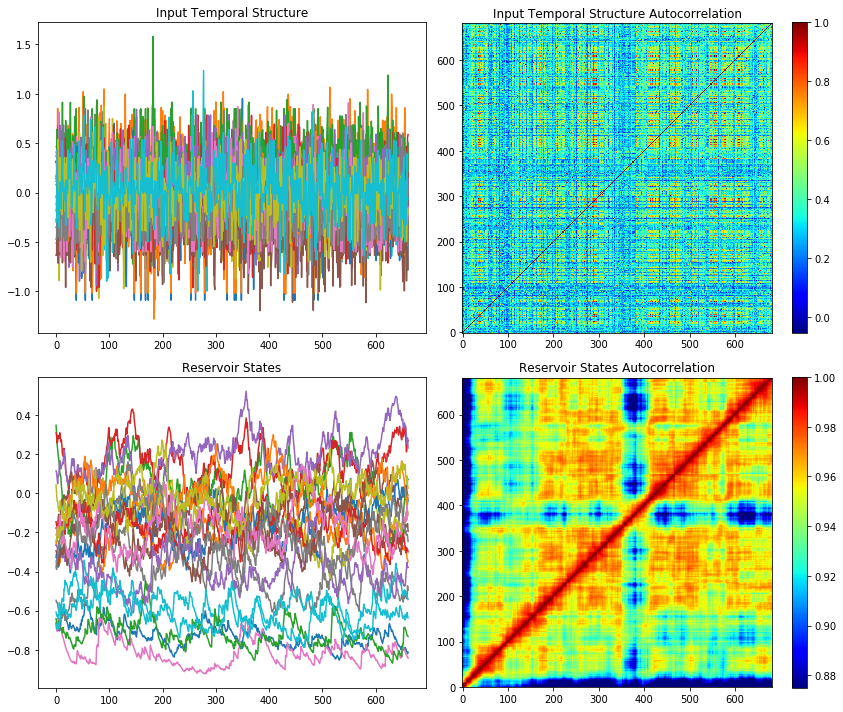

In [11]:
resn = 20
begin = 20
end = 682
fig= plt.figure(figsize=(12,10))
#fig.suptitle('State Trajectories', fontsize=16)
#fig.suptitle('State Trajectories')

plt.subplot(221)

#plt.plot( inputDataTesting[:76,:])
#sns.heatmap(activations, cmap="seismic")
#sns.heatmap(inputDataTesting[300:350,:].T)
plt.plot(inputDataTesting[begin:end,:resn])

#plt.ylim([-1.1,1])
plt.title('Input Temporal Structure')

plt.subplot(222)
plt.imshow(np.corrcoef(inputDataTesting),  cmap='jet',origin='lower')
plt.colorbar()
plt.title('Input Temporal Structure Autocorrelation')

plt.subplot(223)
plt.plot( reservoirStatesBuffer[begin:end,:resn])
#sns.heatmap(reservoirStatesBuffer[300:350,50:150].T)

#plt.ylim([-1.1,1])
plt.title('Reservoir States')



plt.subplot(224)
#sns.heatmap(sim_matrix, square=True, cmap='gist_rainbow', vmin=0.8, vmax=1)
#sns.heatmap(sim_matrix1, square=True, cmap='jet', vmin=0.9, vmax=1, origin='lower')
plt.imshow(np.corrcoef(reservoirStatesBuffer), cmap='jet',  vmin=0.875, vmax=1,origin='lower')
plt.colorbar()

#plt.ylim([-0.1,0.1])
plt.title('Reservoir States Autocorrelation')


fig.tight_layout()

plt.savefig('reservoir-method-2.png',dpi=600)